In [6]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor


In [7]:
env = gym.make("CartPole-v1")
env = Monitor(env)  # records episode rewards


In [8]:
model = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-3,
    buffer_size=50000,
    learning_starts=1000,
    batch_size=32,
    gamma=0.99,
    exploration_fraction=0.3,
    exploration_final_eps=0.02,
    verbose=1
)


Using cpu device
Wrapping the env in a DummyVecEnv.


In [11]:
TIMESTEPS = 10_000
model.learn(total_timesteps=TIMESTEPS)


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 13334    |
|    time_elapsed     | 0        |
|    total_timesteps  | 109      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 9056     |
|    time_elapsed     | 0        |
|    total_timesteps  | 169      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.914    |
| time/               |          |
|    episodes       

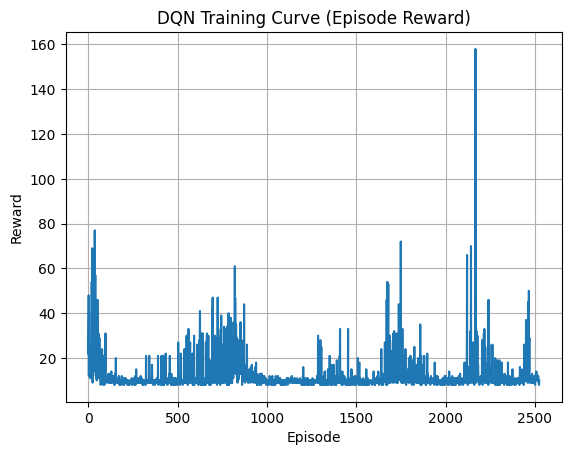

In [12]:
episode_rewards = env.get_episode_rewards()

plt.figure()
plt.plot(episode_rewards)
plt.title("DQN Training Curve (Episode Reward)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()


In [15]:
def evaluate_agent(env, model, episodes=10):
    rewards = []

    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action, _ = model.predict(state, deterministic=True)
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward

        rewards.append(total_reward)

    return np.mean(rewards), rewards


In [16]:
eval_env = gym.make("CartPole-v1")
avg_reward, rewards = evaluate_agent(eval_env, model)

print("DQN Evaluation Results")
print("----------------------")
print("Average Reward:", avg_reward)
print("Rewards:", rewards)


DQN Evaluation Results
----------------------
Average Reward: 9.6
Rewards: [9.0, 9.0, 12.0, 8.0, 9.0, 11.0, 10.0, 8.0, 11.0, 9.0]


In [17]:
def evaluate_random_agent(env, episodes=10):
    rewards = []

    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = env.action_space.sample()
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward

        rewards.append(total_reward)

    return np.mean(rewards), rewards


In [18]:
random_avg, random_rewards = evaluate_random_agent(eval_env)

print("\nRandom Agent Results")
print("--------------------")
print("Average Reward:", random_avg)
print("Rewards:", random_rewards)



Random Agent Results
--------------------
Average Reward: 21.6
Rewards: [16.0, 30.0, 16.0, 29.0, 13.0, 11.0, 36.0, 9.0, 8.0, 48.0]


In [19]:
success_rate = sum(r >= 475 for r in rewards) / len(rewards)
print("Success Rate:", success_rate * 100, "%")


Success Rate: 0.0 %
